<a href="https://colab.research.google.com/github/nidhin-koshy/Notebooks/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression

Regression deals with finding an appropriate function mapping from the input variables (independednt variables) to the output variable (dependent variable) from the available data points. The aim is to obtain a regression function that minimizes the appropriate cost function, and further that it belongs to the constrained class of regression functions. 

##Linear Regression

Regression where the class of regression functions are restricted to linear or affine functions. Linear regression is one of the easiest and simplest forms of regression. 


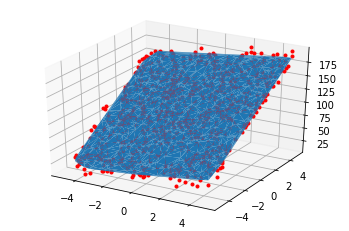

In [13]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def mean_squared_error(output_var,input_var,theta):
  error = output_var-np.matmul(input_var,theta)
  return (np.linalg.norm(error)**2)/np.size(error)

theta = np.array([[3.2, 14.1, 100]]).transpose() # the third element corresponds to the constant component.
#print(theta)
num_samples = 1000;
x = np.random.rand(num_samples,2)*10 - 5 # generate random input points
x1 = np.concatenate((x, np.ones((num_samples,1),dtype=x.dtype)), axis=1) #append all ones column to x

y = np.matmul(x1,theta) # noiseless linear output
temp =  10*np.random.randn(num_samples,1)
y1 = y + temp # add Gaussian noise to the output

#Noisy observation of independent variables
#x2 = x+np.random.randn(num_samples,2)*2
#x1 = np.concatenate((x2, np.ones((num_samples,1),dtype=x.dtype)), axis=1) #append all ones column to x


#print(y[1:5])
#print(y1[1:5])

ax = plt.axes(projection='3d')

ax.plot_trisurf(x[:,0], x[:,1], y[:,0])
ax.plot(x[:,0], x[:,1], y1[:,0],'.r')

##Least Squares

Least squares solution ($\theta^*$) is defined as $$ \theta^* = \arg \min_\theta \sum_i^n \Vert y_i -  x_i^T\theta\Vert^2$$

The least square solution can be derived to be the product of Moore-Penrose pseudo inverse of $X$ and $y$

$$\theta^* = (X^TX)^{-1}X^Ty,$$

where $X =  \begin{bmatrix}x_1^T \\ x_2^T\\\vdots\\ x_n^T \end{bmatrix}$

In [14]:
temp = np.linalg.inv(np.matmul(x1.transpose(),x1))
temp = np.matmul(temp,x1.transpose()) # try the inbulit pseudo inverse function available in numpy
theta_LS = np.matmul(temp,y1)
print("LS solution = ",theta_LS)
print("The mean squared error = ", mean_squared_error(y1,x1,theta_LS))


LS solution =  [[  3.02558836]
 [ 14.08848114]
 [100.3303205 ]]
The mean squared error =  102.10035723204808


##Gradient Descent based optimization

The least squares solution is the optimum solution that minimizes the squared error. However, finding the pseudo inverse can be computationally intensive due to the need to find a matrix inverse, especially when the number of features are large. An alternative approach is to iteratively arrive at the optimum solution via gradient descent. 

Let $\theta$ denote the current linear regression solution. The empirical mean squared error is given by

$$e^2 = \frac{1}{n}\sum_{i=1}^n (y_i-\theta^Tx_i)^2$$

The partial derivative with respect to $\theta_j$ is 
$$\frac{\partial e^2}{\partial \theta_j} = \frac{1}{n}\sum_{i=1}^n 2*(y_i-\theta^Tx_i) (-x_{ij}).$$

The gradient can then be written as  $$\nabla_\theta(e^2) = -\frac{1}{n} X^T(y-X\theta)$$

##Batch gradient descent
In batch gradient descent, we descent in the direction opposite to the gradient descent calculated as computed above. The resulting update rule is 
$$\theta = \theta -\mu \nabla_\theta(e^2)$$



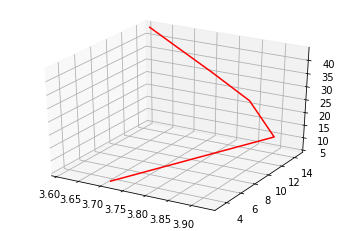

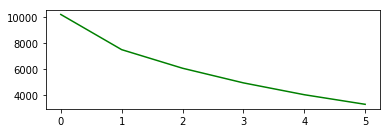

Batch gradient descent solution theta_BGD =  [[ 3.61143008]
 [14.42858876]
 [44.02044432]]
Final MSE =  3270.0616736832685


In [15]:
num_iter = 5
mu = .1
theta = 5*np.random.rand(3,1)
theta_evol = theta
mse_evol = np.array(mean_squared_error(y1,x1,theta))
for count in range(num_iter):
  grad_theta = -1*np.matmul(x1.T,(y1-np.matmul(x1,theta)))/num_samples
  theta1 = theta- mu*grad_theta
  # print(theta, grad_theta,theta1)
  theta = theta1
  
  theta_evol = np.concatenate((theta_evol,theta1),axis=1)
  mse_evol = np.append(mse_evol,mean_squared_error(y1,x1,theta))
 
plt.figure()
plt.subplot(211)
ax = plt.axes(projection='3d')

ax.plot(theta_evol[0,:],theta_evol[1,:], theta_evol[2,:],'-r')
plt.show()
plt.subplot(212)
plt.plot(mse_evol,'-g')
plt.show()


print("Batch gradient descent solution theta_BGD = ", theta)
print("Final MSE = ", mean_squared_error(y1,x1,theta))

## LMS algorithm

In batch gradient descent, the gradient is computed taking into account the error with respect to all training samples. Hence, for each update to the $\theta$ we need to compute the gradient taking into account all the available samples. An advantage of batch gradient descent is that the noise in the gradient computation will be reduced due to the averaging across samples. 

An alternative to this approach is to make updates after computing the gradient with respect to each training sample. Thus we make updates at a faster rate, but using more noisy gradient computations. This approach is also popularly known as the least mean squared (LMS) algorithm. LMS algorithm was proposed by Widrow and Hoff, 1960. LMS belongs to the class of stochastic gradient descent algorithms (the basis of most machine learning algorithms). As we will observe in the examples, the LMS converges faster than batch gradient descent. An intermediate approach is to compute gradient based on a mini-batch (small subset of samples) and make updates only on mini-batch basis.


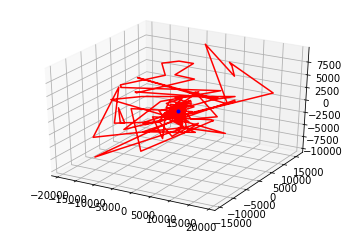

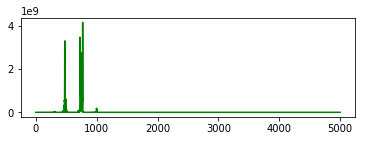

LMS solution theta_LMS =  [[  4.50139395]
 [ 12.4129891 ]
 [100.04587923]]
Final LMS MSE =  141.9516080486622


In [16]:
#LMS
# num_iter = 5
mu = .1
theta = 5*np.random.rand(3,1)
theta_evol = theta
mse_evol = np.array(mean_squared_error(y1,x1,theta))
iter_count = 1;
for count in range(num_iter):
  for count_inner in range(num_samples):
    stepsize = (mu/iter_count)
    iter_count = count+1
    grad_theta = -(y1[count_inner:count_inner+1,0] - np.matmul(x1[count_inner:count_inner+1,:],theta))
    grad_theta = x1[count_inner:count_inner+1,:].T* grad_theta
    #print(grad_theta)
    theta1 = theta- stepsize*grad_theta
    theta_evol = np.concatenate((theta_evol,theta1),axis=1)
    
 # print(theta, grad_theta,theta1)
    theta = theta1
    mse_evol = np.append(mse_evol,mean_squared_error(y1,x1,theta))
 
plt.figure()
plt.subplot(211)
ax = plt.axes(projection='3d')

ax.plot(theta_evol[0,:],theta_evol[1,:], theta_evol[2,:],'-r')
ax.plot(theta[0], theta[1], theta[2],'.b')
plt.show()
plt.subplot(212)
plt.plot(mse_evol,'-g')
plt.show()


print("LMS solution theta_LMS = ", theta)
print("Final LMS MSE = ", mean_squared_error(y1,x1,theta))